# ASCII ART

(100, 100)


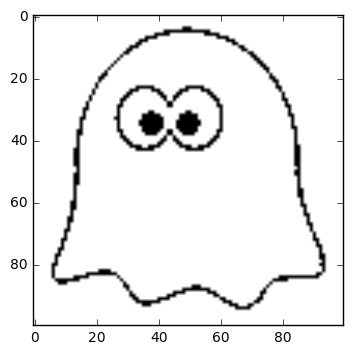

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import colorsys
import copy
import time
import sys
from tqdm import tqdm
from PIL import Image

#img = Image.open('dragon_200.png')
#img = Image.open('pattern.png')
#img = Image.open('ghost_200.png')
img = Image.open('ghost_100.png')
img = img.convert('RGB')

print(img.size)
plt.imshow(img)

In [28]:
TILE_WIDTH = 5
TILE_HEIGTH = 5

class Tile:
    def get_pixel(self, x, y):
        return self.pixels[x][y]
    
    def __init__(self, pixels):
        self.pixels = pixels
        
def tile_equals(tile1, tile2):
    return np.array_equal(tile1.pixels.flatten(), tile2.pixels.flatten())


In [37]:
WIDTH = img.size[0]
HEIGHT = img.size[1]

assert(WIDTH % TILE_WIDTH == 0 and HEIGHT % TILE_HEIGTH == 0)

tiles_x = WIDTH // TILE_WIDTH
tiles_y = HEIGHT // TILE_HEIGTH

def get_tiles_from_img(img):
    img_data = np.array(img.getdata()).reshape(WIDTH, HEIGHT, 3) 
    print("Img data shape: ", img_data.shape)
    
    tiles = []
    for x in range(tiles_x):
        for y in range(tiles_y):
            pixels = []
            count = 0
            for offset_x in range(TILE_WIDTH):
                for offset_y in range(TILE_HEIGTH):
                    rgb = img_data[x * TILE_WIDTH + offset_x][y * TILE_HEIGTH + offset_y]
                    rgb = [x // 255 for x in rgb]
                    assert(sum(rgb) == 0 or sum(rgb) == 3)
                    if (sum(rgb) == 0):
                        pixels.append(0)
                    else:
                        pixels.append(1)
            tiles.append(Tile(np.array(pixels).reshape(TILE_WIDTH, TILE_HEIGTH)))
                         
    result = np.array(tiles)
    print("Returns tiles of shape: ", result.shape)
    return result

In [43]:
tiles = get_tiles_from_img(img)

Img data shape:  (100, 100, 3)
Returns tiles of shape:  (400,)
